In [1]:
import numpy as np

In [2]:
sensitivity_arr = np.loadtxt('quick_sensitivity_fit/data_sensitivity_crossval.tsv')

In [3]:
sensitivity_arr

array([[2.48123515e+17, 5.00755344e-01, 2.98988124e-01],
       [8.04038005e+17, 7.41019002e-01, 1.57574822e-01],
       [1.49762470e+18, 8.35793349e-01, 1.08080166e-01],
       [2.16171021e+18, 8.76029691e-01, 8.88883610e-02],
       [2.65605701e+18, 8.98127078e-01, 1.10100356e-01],
       [3.26342043e+18, 9.26256532e-01, 6.06057007e-02],
       [4.09648456e+18, 9.52308789e-01, 9.19186461e-02],
       [4.64674584e+18, 9.52169834e-01, 9.69691211e-02],
       [5.29567696e+18, 9.47965558e-01, 1.01009501e-01],
       [6.00123515e+18, 9.51827791e-01, 9.99994062e-02],
       [6.72090261e+18, 9.55686461e-01, 7.97975059e-02],
       [7.24323040e+18, 9.67675772e-01, 1.13130641e-01],
       [7.76522565e+18, 9.65523753e-01, 9.09085511e-02],
       [8.64019002e+18, 9.73383610e-01, 6.46460808e-02],
       [8.93629454e+18, 9.65228029e-01, 1.67675772e-01],
       [9.89600950e+18, 9.77106888e-01, 9.09085511e-02],
       [1.07005701e+19, 9.91045131e-01, 1.81817102e-01],
       [1.12502613e+19, 9.66663

In [4]:
import matplotlib.pyplot as plt

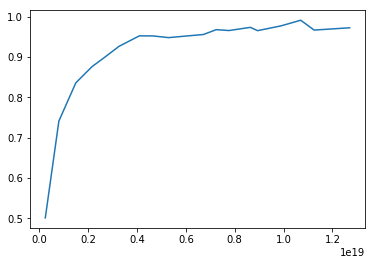

In [5]:
plt.plot(sensitivity_arr[:,0], sensitivity_arr[:,1])
plt.show()

In [6]:
import scipy.optimize as sp_opt

In [7]:
def fit_func(x, A,B,C): 
    return A*np.exp(-B*x) + C

In [19]:
popt, pcov = sp_opt.curve_fit(fit_func, sensitivity_arr[:,0], sensitivity_arr[:,1], method='lm', p0=(-0.56, 0.965/1e18, 0.965), sigma=sensitivity_arr[:,2])

In [20]:
popt

array([-4.77437775e-01,  7.88123455e-19,  9.67088963e-01])

In [21]:
pcov

array([[ 1.20083181e-03, -1.51066750e-21,  1.99974742e-05],
       [-1.51066750e-21,  3.22740500e-39, -1.04878703e-22],
       [ 1.99974742e-05, -1.04878703e-22,  1.15660844e-05]])

In [22]:
np.sqrt(np.diag(pcov))

array([3.46530203e-02, 5.68102544e-20, 3.40089464e-03])

In [23]:
np.sqrt(np.diag(pcov))/popt

array([-0.07258123,  0.07208294,  0.00351663])

In [24]:
func_plt_x = np.arange(0,np.max(sensitivity_arr[:,0]),np.max(sensitivity_arr[:,0])/100)
func_plt_y = fit_func(func_plt_x, *popt)

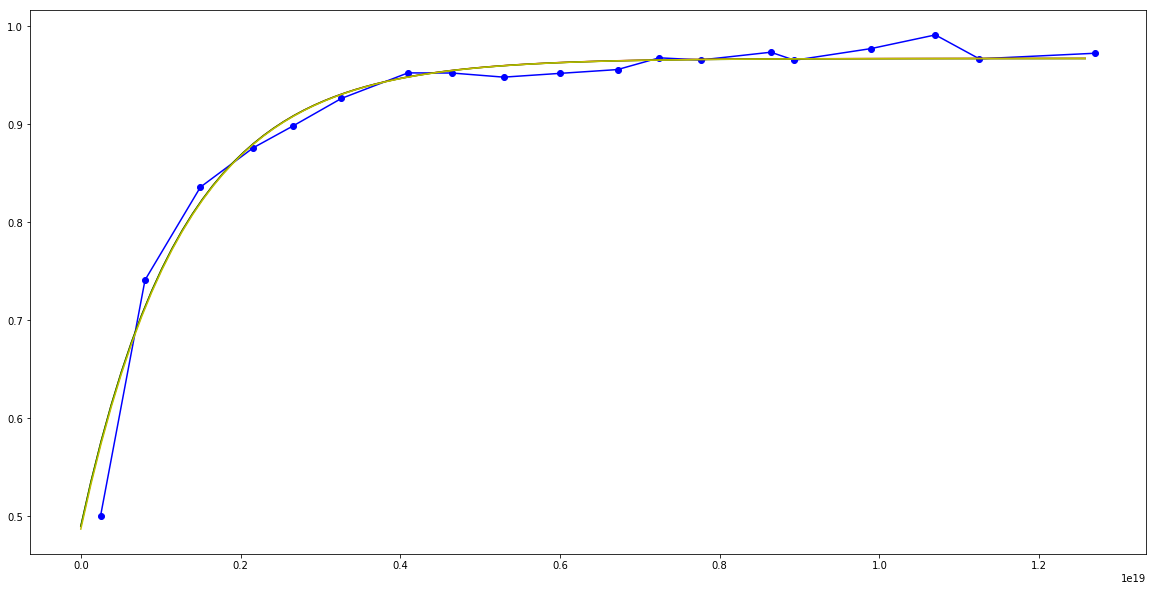

In [28]:
plt.plot(sensitivity_arr[:,0], sensitivity_arr[:,1],'bo-')
plt.plot(func_plt_x, func_plt_y, 'r')
plt.plot(func_plt_x, fit_func(func_plt_x, -4.77e-01,  7.88e-19,  9.67e-01), 'g')
plt.plot(func_plt_x, fit_func(func_plt_x, -0.48,  7.88e-19,  0.967), 'y')
plt.gcf().set_size_inches(20,10)
plt.show()

```
A*np.exp(-B*x) + C
p  -4.77437775e-01,  7.88123455e-19,  9.67088963e-01
e   3.46530203e-02,  5.68102544e-20,  3.40089464e-03
f  -0.07258123,      0.07208294,      0.00351663
```
$-0.48 e^{-7.88\cdot 10^{-19} x} + 0.97$


In [15]:
popt, pcov = sp_opt.curve_fit(fit_func, sensitivity_arr[:,0]/1e18, sensitivity_arr[:,1])

In [16]:
popt, pcov

(array([-0.5666767 ,  0.96547516,  0.96419197]),
 array([[ 6.18630858e-04, -1.16207454e-03,  2.60250635e-06],
        [-1.16207454e-03,  5.05300662e-03, -1.53607465e-04],
        [ 2.60250635e-06, -1.53607465e-04,  2.15022075e-05]]))

In [17]:
func_plt_x = np.arange(0,np.max(sensitivity_arr[:,0]),np.max(sensitivity_arr[:,0])/100)
func_plt_y = fit_func(func_plt_x/1e18, *popt)  # -0.56, 0.965, 0.965) #

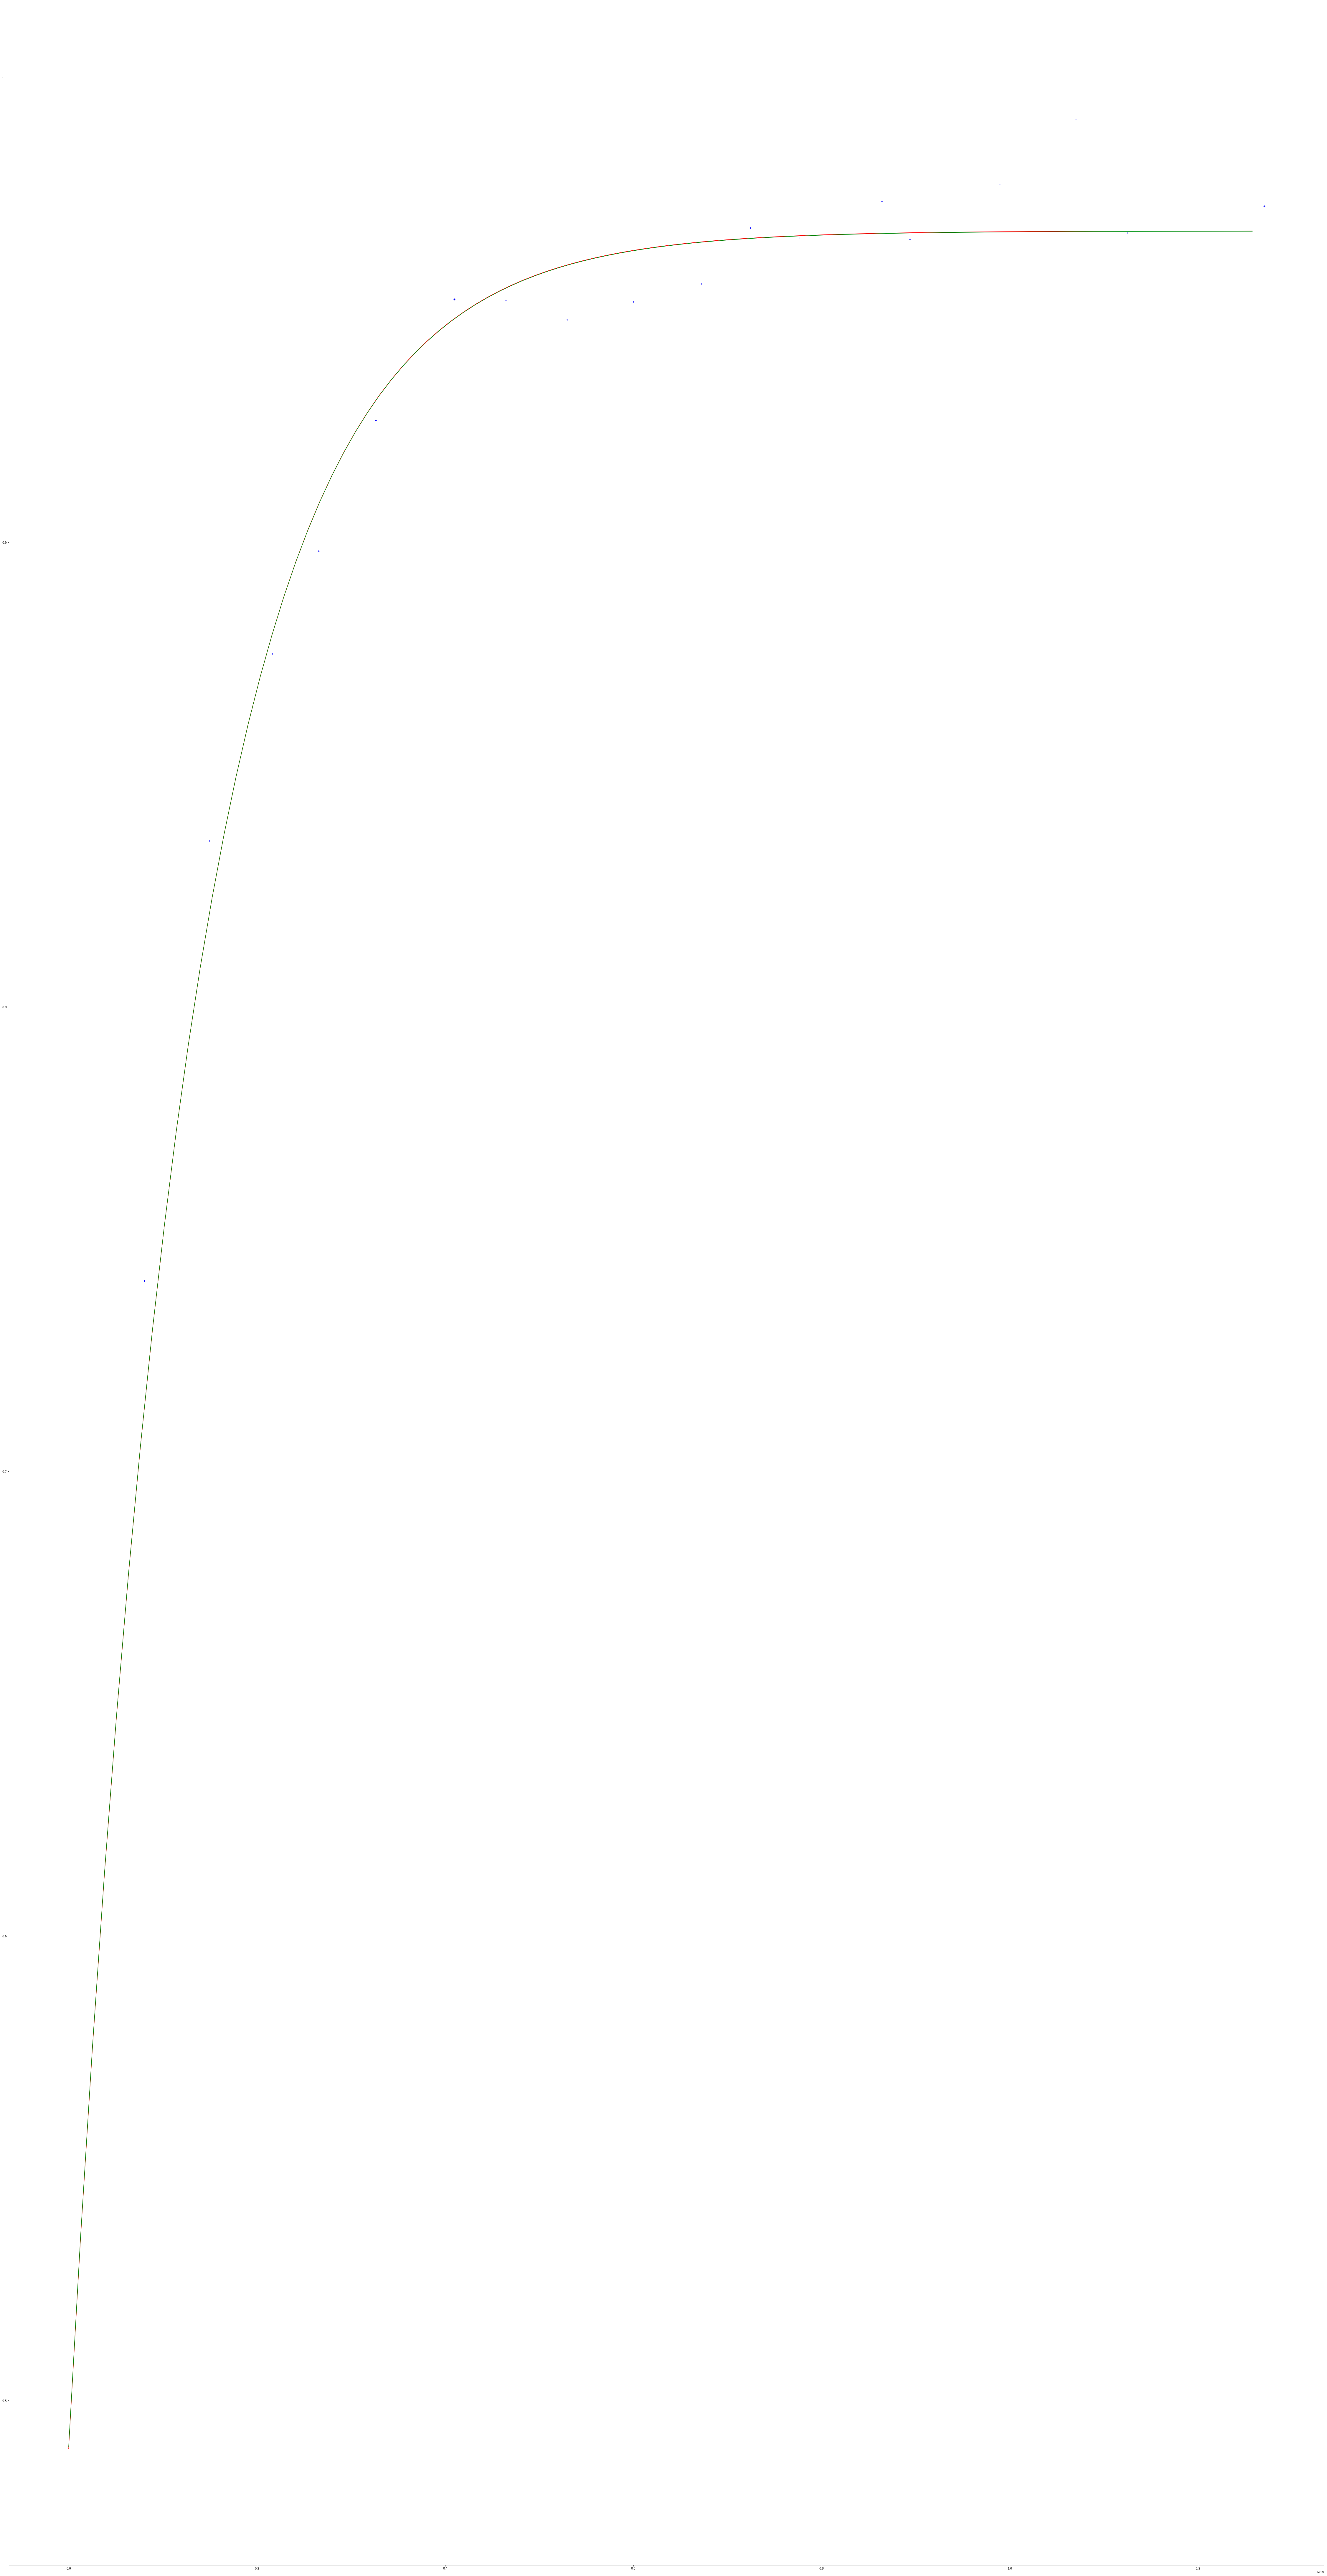

In [26]:
plt.plot(sensitivity_arr[:,0], sensitivity_arr[:,1],'b+')
plt.plot(func_plt_x, func_plt_y, 'r')
plt.plot(func_plt_x, fit_func(func_plt_x, -4.77e-01,  7.88e-19,  9.67e-01), 'g')
plt.gcf().set_size_inches(80,160)
plt.show()